# DC2 Sprinkler Validation Tests

The most recent Sprinkler Truth Catalogs are in `/global/cscratch1/sd/brycek/example_truth`.

Unlensed SNe population are in: `/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/sne_cosmoDC2_v1.1.4_MS_DDF.db`

In [ ]:
import os
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

## Lensed AGN validation tests

In [39]:
! pip install astropy --upgrade

OSError: [Errno 12] Cannot allocate memory

## Lensed SNe validation tests

#### Load necessary files

Unlensed SNe population files are in: `/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/` with filenames starting with `sne_cosmoDC2_v1.1.4*`

In [17]:
cosmoDC2_base = '/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/'

In [18]:
conn = sqlite3.connect(os.path.join(cosmoDC2_base, 'sne_cosmoDC2_v1.1.4_MS_DDF.db'))
query = "SELECT * FROM sne_params;"

# Unlensed SNe
unlensed_sne_df = pd.read_sql_query(query,conn)

In [15]:
example_truth_folder = '/global/cscratch1/sd/brycek/example_truth'
conn = sqlite3.connect(os.path.join(example_truth_folder, 'sne_truth.db'))

# Pick only the first image of each SN so we don't have duplicate entries of the same SNe
query = "SELECT * FROM lensed_sne WHERE image_number == 0;"

# DDF unlensed SNe
sprinkled_sne_df = pd.read_sql_query(query,conn)

### SN Population Comparison

In [19]:
unlensed_sne_df.head()

,htmid_level_6,galaxy_id,c_in,mB,t0_in,x0_in,x1_in,z_in,snid_in,snra_in,sndec_in
0,9021,10562502111,0.035201,18.516489,60772.368515,0.000617,1.477374,0.077278,MS_10199_0,66.115587,-40.866055
1,9023,10562500822,-0.086665,17.966773,63060.297448,0.001028,0.576378,0.073256,MS_10199_1,66.662435,-42.042877
2,9021,10562500735,0.037553,19.078334,62832.166508,0.000370,-0.177457,0.068469,MS_10199_2,65.212146,-41.416473
3,9021,10562502246,0.076715,19.192019,61400.008116,0.000335,-1.344205,0.080189,MS_10199_3,65.469824,-41.109646
4,9023,10562504918,-0.012653,19.388848,61342.657248,0.000278,0.474204,0.115499,MS_10199_5,65.986211,-42.086708


In [16]:
sprinkled_sne_df.head()

,index,unique_id,gal_unq_id,ra,dec,t0,t_delay,MB,magnification,x0,x1,c,host_type,redshift,dc2_sys_id,lens_cat_sys_id,image_number
0,0,1687501546316000,1687501546316000,52.848251,-27.656524,60733.028599,0.0,-19.241234,1.511290,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,0
1,4,1687502575216008,1687502575216008,52.637745,-28.040920,60531.982206,0.0,-19.120594,2.261117,0.000086,1.0,0.0,kinney-starburst,0.188217,2001,6724378,0
2,6,1687504325716016,1687504325716016,52.765482,-27.706339,62973.622594,0.0,-19.372602,2.326046,0.000059,1.0,0.0,kinney-sc,0.245165,2002,9923868,0
3,8,1687506281016024,1687506281016024,52.532876,-28.020799,61523.740726,0.0,-19.106845,2.316066,0.000033,1.0,0.0,kinney-elliptical,0.283273,2003,985566,0
4,10,1687506284916032,1687506284916032,52.655521,-27.958024,60094.543280,0.0,-19.213396,1.955134,0.000062,1.0,0.0,kinney-elliptical,0.226327,2004,6615075,0


Text(0, 0.5, 'Population Density')

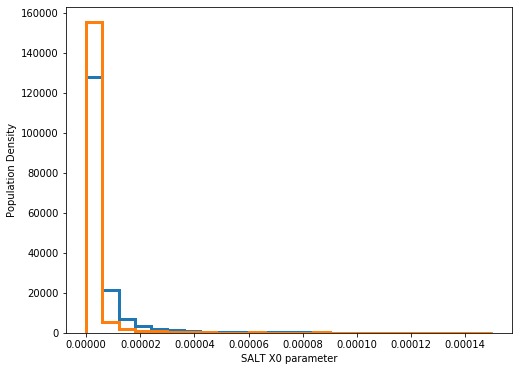

In [33]:
fig = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(unlensed_sne_df['x0_in'], bins=25, range=(0.0, 0.00015), lw=3, histtype='step', density=True, label='Unlensed')
_ = plt.hist(sprinkled_sne_df['x0'], bins=bins, lw=3, histtype='step', density=True, label='Sprinkled')
plt.xlabel('SALT X0 parameter')
plt.ylabel('Population Density')